# **AI Policy Data Collection & Analysis Demo**

AI Policy Analysis Toolkit - Demo Notebook

1. INITIALIZING DATA COLLECTION
------------------------------
Target countries: algeria, eu, usa
Collected 4 documents for analysis

Document distribution by country:


,count
country,
algeria,1
eu,1
usa,1
canada,1



Document types:


,count
document_type,
guideline,2
strategy,1
policy,1




2. POLICY FRAMEWORK ANALYSIS
-----------------------------------
Analyzing documents for AI principle coverage...
Analysis complete!
Total documents analyzed: 4


3. COVERAGE MATRIX GENERATION
-----------------------------------
AI Principle Coverage by Country:


,fairness,transparency,accountability,privacy,human_oversight,robustness,non_maleficence
country,,,,,,,
usa,1.0,0.0,0.0,1.0,0.0,0.0,1.0
algeria,1.0,1.0,1.0,1.0,1.0,0.0,1.0
canada,0.0,1.0,1.0,1.0,0.0,1.0,1.0
eu,1.0,1.0,1.0,1.0,0.0,1.0,1.0



Detailed Analysis DataFrame shape: (4, 11)


,Country,Document,Type,Overall_Coverage,Fairness,Transparency,Accountability,Privacy,Human_Oversight,Robustness,Non_Maleficence
0,ALGERIA,Algeria National Artificial Intelligence Strat...,strategy,0.857143,1.0,1.0,1.0,1.0,1.0,0.0,1.0
1,EU,Ethics Guidelines for Trustworthy AI - Europea...,guideline,0.857143,1.0,1.0,1.0,1.0,0.0,1.0,1.0
2,USA,Blueprint for an AI Bill of Rights - White Hou...,policy,0.428571,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,CANADA,Artificial Intelligence and Data Protection - ...,guideline,0.714286,0.0,1.0,1.0,1.0,0.0,1.0,1.0




4. CREATING VISUALIZATIONS
------------------------------


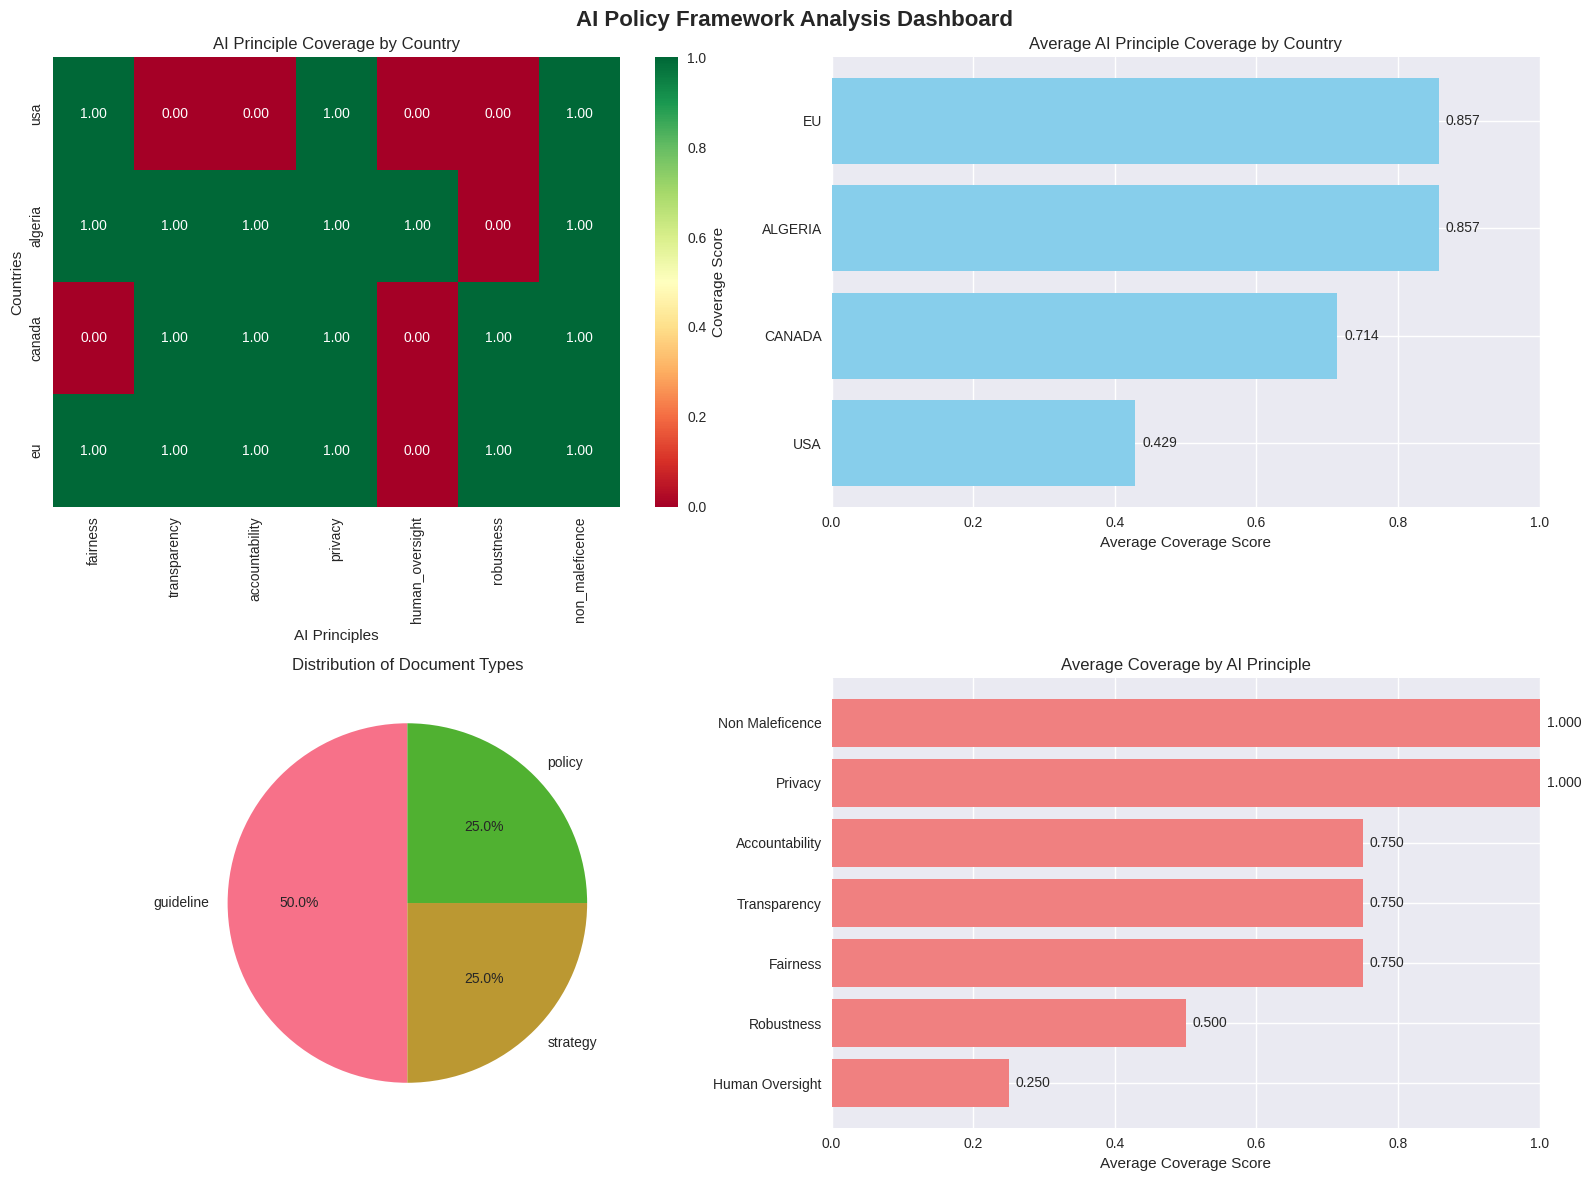



5. GAP ANALYSIS AND RECOMMENDATIONS
----------------------------------------
Most Common Gaps in AI Principle Coverage:
- Human Oversight: 3 documents
- Robustness: 2 documents
- Transparency: 1 documents
- Accountability: 1 documents
- Fairness: 1 documents

Total documents with gaps: 4

Gaps by Country:
ALGERIA:
  - Robustness: 1 document(s)
EU:
  - Human Oversight: 1 document(s)
USA:
  - Transparency: 1 document(s)
  - Accountability: 1 document(s)
  - Human Oversight: 1 document(s)
  - Robustness: 1 document(s)
CANADA:
  - Fairness: 1 document(s)
  - Human Oversight: 1 document(s)

RECOMMENDATIONS:
1. Strengthen coverage of: human_oversight
2. algeria: Focus on robustness
3. eu: Focus on human_oversight
4. usa: Focus on transparency, accountability, human_oversight, robustness
5. canada: Focus on fairness, human_oversight


6. EXPORTING RESULTS
-------------------------
Exported files:
- outputs/detailed_policy_analysis.json
- outputs/coverage_matrix.csv
- outputs/detailed_analys

In [3]:
# AI Policy Data Collection & Analysis Demo
# This notebook demonstrates the complete workflow for collecting and analyzing AI governance policies

import sys
import os


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import json

# Import our custom modules
# from data_collection.policy_scraper import PolicyScraper # Removed as PolicyScraper is defined in a cell above
# from analysis.policy_framework_mapper import PolicyFrameworkMapper # Removed as PolicyFrameworkMapper is defined in a cell above

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("AI Policy Analysis Toolkit - Demo Notebook")
print("=" * 50)

# ## 1. Data Collection
# Let's start by collecting AI policy documents from different countries

print("\n1. INITIALIZING DATA COLLECTION")
print("-" * 30)

# Initialize the policy scraper
# The PolicyScraper class is defined in the cell above this one
scraper = PolicyScraper()

# Define countries to analyze
target_countries = ['algeria', 'eu', 'usa']
print(f"Target countries: {', '.join(target_countries)}")

# For demo purposes, we'll use sample data instead of live scraping
# In real usage, uncomment the line below:
# documents = scraper.scrape_government_sites(target_countries)

# Sample documents for demonstration
sample_documents = [
    {
        'url': 'https://www.joradp.dz/algeria-ai-strategy-2025',
        'title': 'Algeria National Artificial Intelligence Strategy 2025-2030',
        'country': 'algeria',
        'document_type': 'strategy',
        'content_type': 'html',
        'content_preview': 'The Republic of Algeria recognizes artificial intelligence as a key driver for economic development and social progress. This national strategy emphasizes fairness and equity in AI applications, ensuring transparency in algorithmic decision-making processes. We are committed to protecting citizen privacy and establishing robust governance frameworks. Human oversight remains paramount in all AI implementations, and we prioritize the development of safe and reliable AI systems that serve our national interests while preventing potential harm to our society.',
        'scraped_date': '2025-01-15T10:30:00',
        'ai_relevance_score': 0.85,
        'word_count': 1250
    },
    {
        'url': 'https://digital-strategy.ec.europa.eu/en/library/ethics-guidelines-trustworthy-ai',
        'title': 'Ethics Guidelines for Trustworthy AI - European Commission',
        'country': 'eu',
        'document_type': 'guideline',
        'content_type': 'html',
        'content_preview': 'Trustworthy AI requires three components working in harmony: it should be lawful, complying with all applicable laws and regulations; ethical, ensuring adherence to ethical principles and values; and robust, both from a technical and social perspective. The guidelines emphasize human agency and oversight, technical robustness and safety, privacy and data governance, transparency, diversity and fairness, societal and environmental well-being, and accountability. AI systems should be human-centric and designed to augment human capabilities and empower human decision-making.',
        'scraped_date': '2025-01-15T11:00:00',
        'ai_relevance_score': 0.95,
        'word_count': 2100
    },
    {
        'url': 'https://www.whitehouse.gov/ostp/ai-bill-of-rights/',
        'title': 'Blueprint for an AI Bill of Rights - White House OSTP',
        'country': 'usa',
        'document_type': 'policy',
        'content_type': 'html',
        'content_preview': 'Americans deserve protection from unsafe or ineffective AI systems. The Blueprint for an AI Bill of Rights establishes five principles: Safe and Effective Systems that undergo pre-deployment testing and ongoing monitoring; Algorithmic Discrimination Protections to ensure equitable treatment; Data Privacy through built-in protections and user agency over data use; Notice and Explanation when automated systems are being used and how they work; and Human Alternatives, Consideration, and Fallback for meaningful access to a human who can quickly resolve problems with AI systems.',
        'scraped_date': '2025-01-15T11:15:00',
        'ai_relevance_score': 0.90,
        'word_count': 1800
    },
    {
        'url': 'https://www.canada.ca/en/innovation-science-economic-development/news/2023/artificial-intelligence-data-commissioner-guidance',
        'title': 'Artificial Intelligence and Data Protection - Privacy Commissioner of Canada',
        'country': 'canada',
        'document_type': 'guideline',
        'content_type': 'html',
        'content_preview': 'The use of artificial intelligence raises significant privacy concerns that organizations must address. This guidance emphasizes the importance of privacy by design, ensuring that AI systems are developed with strong privacy protections from the outset. Organizations must ensure transparency in their AI processes, obtain meaningful consent for data processing, implement appropriate security measures, and provide individuals with control over their personal information. Accountability measures must be in place to demonstrate compliance with privacy laws and principles.',
        'scraped_date': '2025-01-15T11:30:00',
        'ai_relevance_score': 0.75,
        'word_count': 1600
    }
]

documents = sample_documents
print(f"Collected {len(documents)} documents for analysis")

# Display basic statistics
df_docs = pd.DataFrame(documents)
print(f"\nDocument distribution by country:")
display(df_docs['country'].value_counts()) # Use display for better formatting
print(f"\nDocument types:")
display(df_docs['document_type'].value_counts()) # Use display for better formatting

# ## 2. Policy Framework Analysis

print("\n\n2. POLICY FRAMEWORK ANALYSIS")
print("-" * 35)

# Initialize the framework mapper
# The PolicyFrameworkMapper class is defined in the cell above this one
mapper = PolicyFrameworkMapper()

# Analyze the document collection
print("Analyzing documents for AI principle coverage...")
analysis = mapper.analyze_document_collection(documents)

print(f"Analysis complete!")
print(f"Total documents analyzed: {analysis['total_documents']}")

# ## 3. Generate Coverage Matrix

print("\n\n3. COVERAGE MATRIX GENERATION")
print("-" * 35)

# Generate coverage matrix
coverage_matrix = mapper.generate_coverage_matrix(analysis['documents'])
print("AI Principle Coverage by Country:")
display(coverage_matrix.round(3)) # Use display for better formatting

# Create a more detailed DataFrame for analysis
detailed_results = []
for doc_analysis in analysis['documents']:
    row = {
        'Country': doc_analysis['country'].upper(),
        'Document': doc_analysis['title'][:50] + "..." if len(doc_analysis['title']) > 50 else doc_analysis['title'],
        'Type': doc_analysis['document_type'],
        'Overall_Coverage': doc_analysis['overall_coverage']
    }

    # Add principle scores
    for principle, score in doc_analysis['principle_scores'].items():
        row[principle.replace('_', '_').title()] = score

    detailed_results.append(row)

detailed_df = pd.DataFrame(detailed_results)
print(f"\nDetailed Analysis DataFrame shape: {detailed_df.shape}")
display(detailed_df.head()) # Use display for better formatting

# ## 4. Visualization

print("\n\n4. CREATING VISUALIZATIONS")
print("-" * 30)

# Set up the plot layout
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('AI Policy Framework Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Coverage Matrix Heatmap
ax1 = axes[0, 0]
sns.heatmap(coverage_matrix, annot=True, cmap='RdYlGn', vmin=0, vmax=1,
            fmt='.2f', ax=ax1, cbar_kws={'label': 'Coverage Score'})
ax1.set_title('AI Principle Coverage by Country')
ax1.set_xlabel('AI Principles')
ax1.set_ylabel('Countries')

# 2. Overall Coverage by Country
ax2 = axes[0, 1]
country_avg = detailed_df.groupby('Country')['Overall_Coverage'].mean().sort_values(ascending=True)
bars = ax2.barh(country_avg.index, country_avg.values, color='skyblue')
ax2.set_title('Average AI Principle Coverage by Country')
ax2.set_xlabel('Average Coverage Score')
ax2.set_xlim(0, 1)

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax2.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', ha='left', va='center')

# 3. Document Type Distribution
ax3 = axes[1, 0]
doc_type_counts = detailed_df['Type'].value_counts()
wedges, texts, autotexts = ax3.pie(doc_type_counts.values, labels=doc_type_counts.index,
                                   autopct='%1.1f%%', startangle=90)
ax3.set_title('Distribution of Document Types')

# 4. Principle Coverage Distribution
ax4 = axes[1, 1]
principle_cols = [col for col in detailed_df.columns if col not in ['Country', 'Document', 'Type', 'Overall_Coverage']]
principle_means = detailed_df[principle_cols].mean().sort_values(ascending=True)
bars = ax4.barh(range(len(principle_means)), principle_means.values, color='lightcoral')
ax4.set_yticks(range(len(principle_means)))
ax4.set_yticklabels([label.replace('_', ' ') for label in principle_means.index])
ax4.set_title('Average Coverage by AI Principle')
ax4.set_xlabel('Average Coverage Score')
ax4.set_xlim(0, 1)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax4.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', ha='left', va='center')

plt.tight_layout()
plt.show()

# ## 5. Gap Analysis and Recommendations

print("\n\n5. GAP ANALYSIS AND RECOMMENDATIONS")
print("-" * 40)

# Display gap analysis
gaps = analysis['gap_analysis']
print("Most Common Gaps in AI Principle Coverage:")
for gap, count in gaps['most_common_gaps'].items():
    print(f"- {gap.replace('_', ' ').title()}: {count} documents")

print(f"\nTotal documents with gaps: {gaps['total_documents_with_gaps']}")

# Country-specific gaps
print(f"\nGaps by Country:")
for country, country_gaps in gaps['gaps_by_country'].items():
    if country_gaps:
        print(f"{country.upper()}:")
        for gap, count in country_gaps.items():
            print(f"  - {gap.replace('_', ' ').title()}: {count} document(s)")

# Display recommendations
print(f"\nRECOMMENDATIONS:")
for i, rec in enumerate(analysis['recommendations'], 1):
    print(f"{i}. {rec}")

# ## 6. Export Results

print("\n\n6. EXPORTING RESULTS")
print("-" * 25)

# Create outputs directory
os.makedirs('outputs', exist_ok=True)

# Export detailed analysis
mapper.export_analysis(analysis, 'outputs/detailed_policy_analysis.json')

# Export coverage matrix
coverage_matrix.to_csv('outputs/coverage_matrix.csv')

# Export detailed results
detailed_df.to_csv('outputs/detailed_analysis_results.csv', index=False)

# Generate and save summary report
summary_report = mapper.generate_summary_report(analysis)
with open('outputs/summary_report.txt', 'w', encoding='utf-8') as f:
    f.write(summary_report)

print("Exported files:")
print("- outputs/detailed_policy_analysis.json")
print("- outputs/coverage_matrix.csv")
print("- outputs/detailed_analysis_results.csv")
print("- outputs/summary_report.txt")

# ## 7. Summary Statistics

print("\n\n7. SUMMARY STATISTICS")
print("-" * 25)

print(f"Analysis Summary:")
print(f"- Total documents analyzed: {len(documents)}")
print(f"- Countries covered: {detailed_df['Country'].nunique()}")
print(f"- Document types: {', '.join(detailed_df['Type'].unique())}")
print(f"- Average overall coverage: {detailed_df['Overall_Coverage'].mean():.3f}")
print(f"- Highest coverage country: {detailed_df.groupby('Country')['Overall_Coverage'].mean().idxmax()}")
print(f"- Most covered principle: {principle_means.idxmax().replace('_', ' ')}")
print(f"- Least covered principle: {principle_means.idxmin().replace('_', ' ')}")

print(f"\nAnalysis completed at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("=" * 50)
print("AI Policy Analysis Demo Complete!")